##**IMPORTAÇÃO DAS BIBLIOTECAS E FUNÇÃO FFT**

In [1]:
###############################################################################
# Importação das Bibliotecas
import numpy as np, scipy as sp, matplotlib.pyplot as plt
from scipy import signal
from scipy.signal.fir_filter_design import fft
import pandas as pd, numpy as np
import requests
%matplotlib inline
###############################################################################
#FUNÇÃO FFT
def fourier(x, t, Hz=False, dB=False, deg=False, Nfft=None):   

     N = len(x)
     T = t[1] - t[0]
    
     if Nfft==None:     
       Nfft = N    
       
     X_f = fft(x, n=Nfft) 
     X_f = X_f/N 
     X_f = X_f[:Nfft//2] 
     X_f[1:] = 2*X_f[1:] 
 
     if Hz==True:
      f0 = 1/(Nfft*T) 
      fHz = np.arange(Nfft)*f0 
      f = fHz[:Nfft//2]     
     else:
       w0 = 2*np.pi/(Nfft*T) 
       wRad = np.arange(Nfft)*w0 
       f = wRad[:Nfft//2]
    
     if dB==False:
      mag = np.abs(X_f)
    
     else:
      mag = 20*np.log10(np.abs(X_f))

     if deg==False:
      pha = np.angle(X_f, deg=0)
     else:
      pha = np.angle(X_f, deg=1)

     return mag, pha, f 
##############################################################################

##**1. (TESTE EM BANCADA) MOTOR EM BOM ESTADO E DANIFICADO**



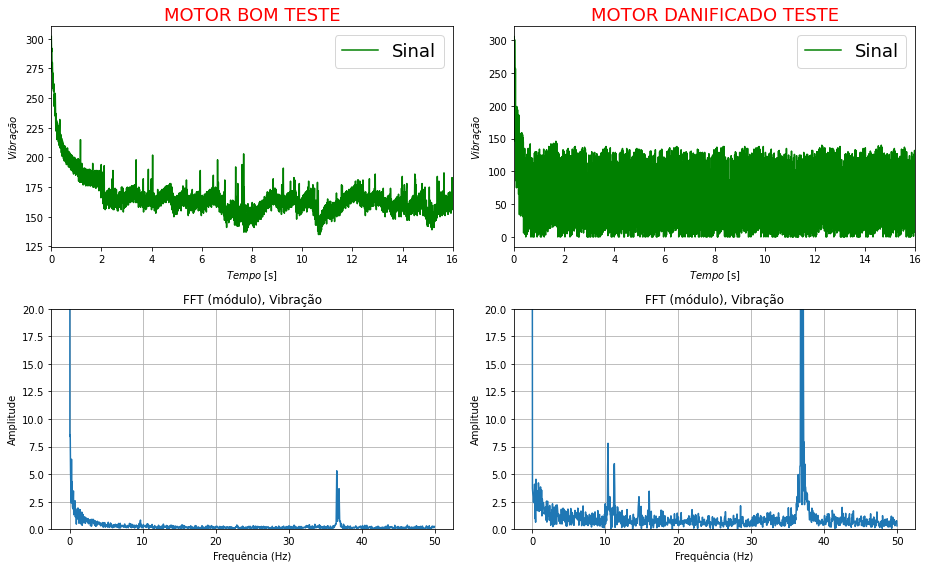

In [2]:
##############################################################################
# ENDEREÇAMENTO DOS DADOS MEDIDOS
dadosteste= r'https://raw.githubusercontent.com/lucio-paulo/Processamento_Trabalho_Final_AliceLucio/main/MOTOR_BOM_TESTe.csv'
dados = pd.read_csv(dadosteste)

# DECLARAÇÃO DAS VARIAVEIS
Tempo = dados['Millis'].to_numpy()
Millis =Tempo/1000
Leituras = dados['Leituras'].to_numpy()

# GRÁFICO DOMÍNIO DO TEMPO DO SINAL MEDIDO
plt.figure(figsize=(13,8))
plt.subplot(221)
plt.plot(Millis,Leituras,label="Sinal",color = "g")
plt.title("MOTOR BOM TESTE",color = "r",fontsize="18")
plt.xlabel("$Tempo$ [s]")
plt.ylabel("$Vibração$")
plt.legend(fontsize="18")
plt.xlim(0,16)

##############################################################################
# GRÁFICO DOMÍNIO DA FREQUÊNCIA
Leituras = Leituras.reshape(-1)
mag, pha, f = fourier(Leituras, Millis, Hz=True, dB=False, deg=False, Nfft=None)
plt.subplot(223) 
plt.plot(f, mag) 
plt.title("FFT (módulo), Vibração") 
plt.xlabel("Frequência (Hz)")
plt.ylabel("Amplitude")
plt.ylim(0,20) 
plt.grid(1); 
##############################################################################
# ENDEREÇAMENTO DOS DADOS MEDIDOS
dadosteste= r'https://raw.githubusercontent.com/lucio-paulo/Processamento_Trabalho_Final_AliceLucio/main/MOTOR_DANIFICADO_TESTE.csv'
dados = pd.read_csv(dadosteste)

# DECLARAÇÃO DAS VARIAVEIS
Tempo = dados['Millis'].to_numpy()
Millis =Tempo/1000
Leituras = dados['Leituras'].to_numpy()

# GRÁFICO DOMÍNIO DO TEMPO DO SINAL MEDIDO
plt.subplot(222)
plt.title("MOTOR DANIFICADO TESTE",color = "r",fontsize="18")
plt.xlabel("$Tempo$ [s]")
plt.ylabel("$Vibração$")
plt.plot(Millis,Leituras,label="Sinal",color = "g")
plt.legend(fontsize="18")
plt.xlim(0,16)
##############################################################################
# GRÁFICO DOMÍNIO DA FREQUÊNCIA
Leituras = Leituras.reshape(-1)
mag, pha, f = fourier(Leituras, Millis, Hz=True, dB=False, deg=False, Nfft=None)
plt.subplot(224)
plt.plot(f, mag) 
plt.title("FFT (módulo), Vibração") 
plt.xlabel("Frequência (Hz)") 
plt.ylabel("Amplitude")
plt.ylim(0,20) 
plt.grid(1); 
plt.tight_layout();

##**2. (TESTE MONTADO NO EQUIPAMENTO) MOTOR DANIFICADO COM E SEM AGITADOR**



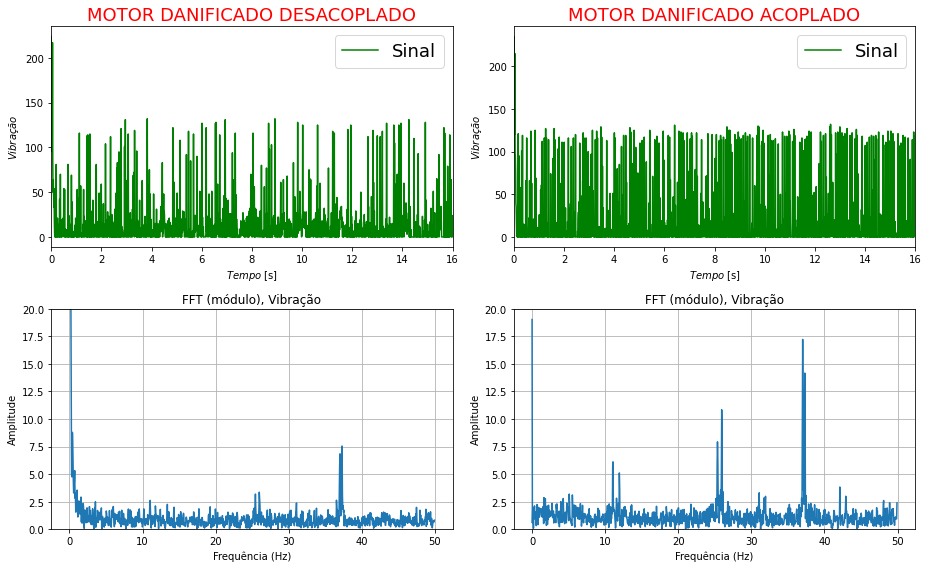

In [3]:
##############################################################################
# ENDEREÇAMENTO DOS DADOS MEDIDOS
dadosteste= r'https://raw.githubusercontent.com/lucio-paulo/Processamento_Trabalho_Final_AliceLucio/main/MOTOR_DANIFICADO_SEM_AGITADOR.csv'
dados = pd.read_csv(dadosteste)

# DECLARAÇÃO DAS VARIAVEIS
Tempo = dados['Millis'].to_numpy()
Millis =Tempo/1000
Leituras = dados['Leituras'].to_numpy()

# GRÁFICO DOMÍNIO DO TEMPO DO SINAL MEDIDO
plt.figure(figsize=(13,8))
plt.subplot(221)
plt.plot(Millis,Leituras,label="Sinal",color = "g")
plt.title("MOTOR DANIFICADO DESACOPLADO",color = "r",fontsize="18")
plt.xlabel("$Tempo$ [s]")
plt.ylabel("$Vibração$")
plt.legend(fontsize="18")
plt.xlim(0,16)

##############################################################################
# GRÁFICO DOMÍNIO DA FREQUÊNCIA
Leituras = Leituras.reshape(-1)
mag, pha, f = fourier(Leituras, Millis, Hz=True, dB=False, deg=False, Nfft=None)
plt.subplot(223) 
plt.plot(f, mag) 
plt.title("FFT (módulo), Vibração") 
plt.xlabel("Frequência (Hz)") 
plt.ylabel("Amplitude")
plt.ylim(0,20) 
plt.grid(1); 
##############################################################################
# ENDEREÇAMENTO DOS DADOS MEDIDOS
dadosteste= r'https://raw.githubusercontent.com/lucio-paulo/Processamento_Trabalho_Final_AliceLucio/main/MOTOR_DANIFICADO_COM_AGITADOR.csv'
dados = pd.read_csv(dadosteste)

# DECLARAÇÃO DAS VARIAVEIS
Tempo = dados['Millis'].to_numpy()
Millis =Tempo/1000
Leituras = dados['Leituras'].to_numpy()

# GRÁFICO DOMÍNIO DO TEMPO DO SINAL MEDIDO
plt.subplot(222)
plt.title("MOTOR DANIFICADO ACOPLADO",color = "r",fontsize="18")
plt.xlabel("$Tempo$ [s]")
plt.ylabel("$Vibração$")
plt.plot(Millis,Leituras,label="Sinal",color = "g")
plt.legend(fontsize="18")
plt.xlim(0,16)
##############################################################################
# GRÁFICO DOMÍNIO DA FREQUÊNCIA
Leituras = Leituras.reshape(-1)
mag, pha, f = fourier(Leituras, Millis, Hz=True, dB=False, deg=False, Nfft=None)
plt.subplot(224)
plt.plot(f, mag) 
plt.title("FFT (módulo), Vibração") 
plt.xlabel("Frequência (Hz)") 
plt.ylabel("Amplitude")
plt.ylim(0,20) 
plt.grid(1); 
plt.tight_layout();

##**3. (TESTE MONTADO NO EQUIPAMENTO) MOTOR BOM COM E SEM AGITADOR**



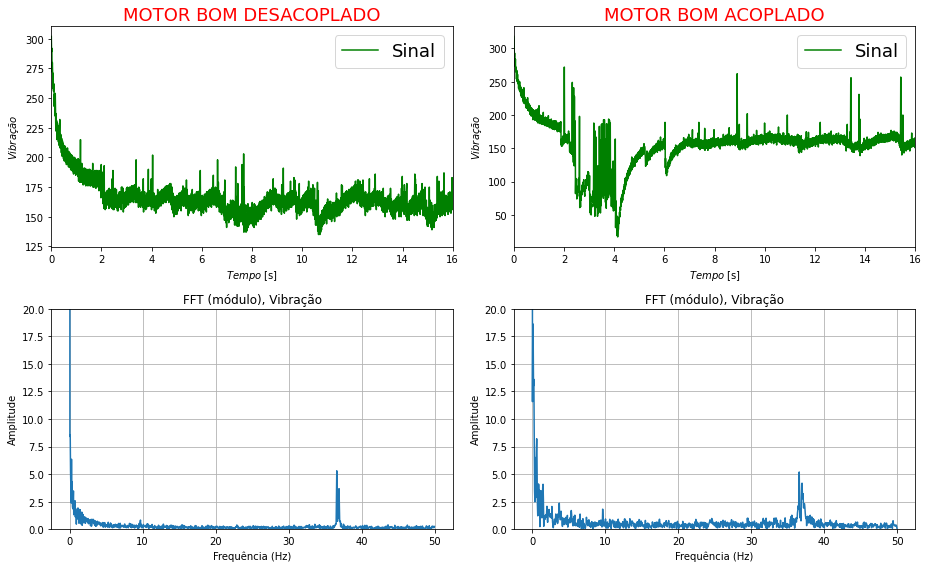

In [4]:
##############################################################################
# ENDEREÇAMENTO DOS DADOS MEDIDOS
dadosteste= r'https://raw.githubusercontent.com/lucio-paulo/Processamento_Trabalho_Final_AliceLucio/main/MOTOR_BOM_DESACOPLADO.csv'
dados = pd.read_csv(dadosteste)

# DECLARAÇÃO DAS VARIAVEIS
Tempo = dados['Millis'].to_numpy()
Millis =Tempo/1000
Leituras = dados['Leituras'].to_numpy()

# GRÁFICO DOMÍNIO DO TEMPO DO SINAL MEDIDO
plt.figure(figsize=(13,8))
plt.subplot(221)
plt.plot(Millis,Leituras,label="Sinal",color = "g")
plt.title("MOTOR BOM DESACOPLADO",color = "r",fontsize="18")
plt.xlabel("$Tempo$ [s]")
plt.ylabel("$Vibração$")
plt.legend(fontsize="18")
plt.xlim(0,16)

##############################################################################
# GRÁFICO DOMÍNIO DA FREQUÊNCIA
Leituras = Leituras.reshape(-1)
mag, pha, f = fourier(Leituras, Millis, Hz=True, dB=False, deg=False, Nfft=None)
plt.subplot(223) 
plt.plot(f, mag) 
plt.title("FFT (módulo), Vibração") 
plt.xlabel("Frequência (Hz)") 
plt.ylabel("Amplitude")
plt.ylim(0,20) 
plt.grid(1); 
##############################################################################
# ENDEREÇAMENTO DOS DADOS MEDIDOS
dadosteste= r'https://raw.githubusercontent.com/lucio-paulo/Processamento_Trabalho_Final_AliceLucio/main/MOTOR_BOM_ACOPLADO.csv'
dados = pd.read_csv(dadosteste)

# DECLARAÇÃO DAS VARIAVEIS
Tempo = dados['Millis'].to_numpy()
Millis =Tempo/1000
Leituras = dados['Leituras'].to_numpy()

# GRÁFICO DOMÍNIO DO TEMPO DO SINAL MEDIDO
plt.subplot(222)
plt.title("MOTOR BOM ACOPLADO",color = "r",fontsize="18")
plt.xlabel("$Tempo$ [s]")
plt.ylabel("$Vibração$")
plt.plot(Millis,Leituras,label="Sinal",color = "g")
plt.legend(fontsize="18")
plt.xlim(0,16)
##############################################################################
# GRÁFICO DOMÍNIO DA FREQUÊNCIA
Leituras = Leituras.reshape(-1)
mag, pha, f = fourier(Leituras, Millis, Hz=True, dB=False, deg=False, Nfft=None)
plt.subplot(224)
plt.plot(f, mag) 
plt.title("FFT (módulo), Vibração") 
plt.xlabel("Frequência (Hz)") 
plt.ylabel("Amplitude")
plt.ylim(0,20) 
plt.grid(1); 
plt.tight_layout();

##**4. GRÁFICO MOSTRANDO DIFERENÇA FFT MOTOR BOM E DANIFICADO**



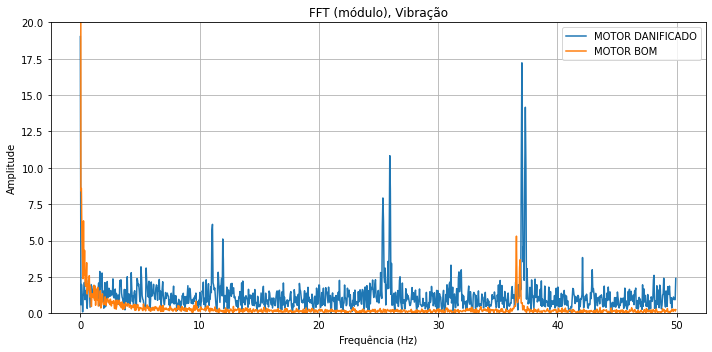

In [5]:
# ENDEREÇAMENTO DOS DADOS MEDIDOS
dadosteste= r'https://raw.githubusercontent.com/lucio-paulo/Processamento_Trabalho_Final_AliceLucio/main/MOTOR_DANIFICADO_COM_AGITADOR.csv'
dados = pd.read_csv(dadosteste)

# DECLARAÇÃO DAS VARIAVEIS
Tempo = dados['Millis'].to_numpy()
Millis =Tempo/1000
Leituras = dados['Leituras'].to_numpy()
########################################################################
# GRÁFICO DOMÍNIO DA FREQUÊNCIA
Leituras = Leituras.reshape(-1)
mag, pha, f = fourier(Leituras, Millis, Hz=True, dB=False, deg=False, Nfft=None)
plt.figure(figsize=(10,5))
plt.plot(f, mag, label="MOTOR DANIFICADO")
legend = plt.legend(loc = 'upper right')
plt.legend()
plt.title("FFT (módulo), Vibração") 
plt.xlabel("Frequência (Hz)") 
plt.ylabel("Amplitude")
plt.ylim(0,20) 
#plt.xlim(0.036,0.038)
plt.grid(1); 
plt.tight_layout();

##############################################################################
# ENDEREÇAMENTO DOS DADOS MEDIDOS
dadosteste= r'https://raw.githubusercontent.com/lucio-paulo/Processamento_Trabalho_Final_AliceLucio/main/MOTOR_BOM_DESACOPLADO.csv'
dados = pd.read_csv(dadosteste)

# DECLARAÇÃO DAS VARIAVEIS
Tempo = dados['Millis'].to_numpy()
Millis =Tempo/1000
Leituras = dados['Leituras'].to_numpy()

##############################################################################
# GRÁFICO DOMÍNIO DA FREQUÊNCIA
Leituras = Leituras.reshape(-1)
mag, pha, f = fourier(Leituras, Millis, Hz=True, dB=False, deg=False, Nfft=None)
plt.plot(f, mag, label="MOTOR BOM")
#legend = plt.legend(loc = 'upper right')
plt.legend() 
plt.title("FFT (módulo), Vibração") 
plt.xlabel("Frequência (Hz)") 
plt.ylabel("Amplitude")
#plt.xlim(0.036,0.038)
plt.ylim(0,20) 
plt.grid(1); 
##############################################################################



##**5. PROJETO FILTRO IIR DETECÇÃO DA FALHA**



In [6]:
from os import WIFSTOPPED
##############################################################################
# ESPECIFICAÇÃO DO FILTRO
Ap = 0.5 # Atenuação máxima dB na faixa de passagem
Ar = 65 # Atenuação mínima dB na faixa de rejeição
Gp = -Ap # Ganho mínimo dB na faixa de passagem
Gr = -Ar # Ganho máximo dB na faixa de regeição

wp1 = 34 # Frequência banda de passagem (Hz)
wr1 = 36 # Frequência banda de rejeição (Hz)
wr2 = 38 # Frequência banda de rejeição (Hz) 
wp2 = 40 # Frequência banda de passagem (Hz)
ws = 100 # Frequência de amostragem (Hz)

wp1a = 2*np.pi*wp1 # Frequência banda de passagem (rad/s)
wr1a = 2*np.pi*wr1 # Frequência banda de rejeição (rad/s)
wr2a= 2*np.pi*wr2# Frequência banda de rejeição (rad/s) 
wp2a = 2*np.pi*wp2 # Frequência banda de passagem (rad/s)
wsa = 2*np.pi*ws # Frequência banda de passagem (rad/s)


T= 2*np.pi/ws # seg. período de amostragem
Ta= 1/wsa # seg. período de amostragem

# Ondulações nas bandas de passagem e rejeição
dp = 1-10**(Gp/20) # ondulação na faixa de passagem
dr =10**(Gr/20) # ondulação na faixa de rejeição



##**6. FILTRO ELIPTICO**



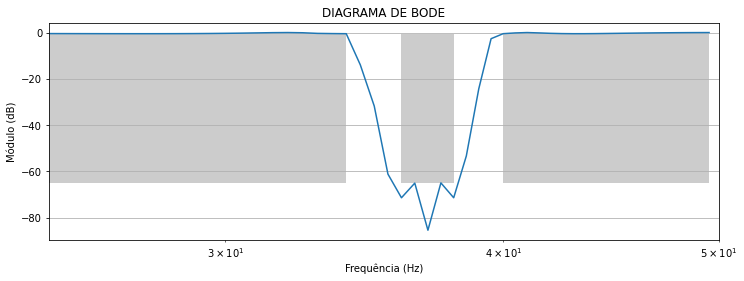

In [8]:
##############################################################################
#3 PROJETO DO FILTRO IIR

z1, p1, k1 = signal.iirdesign(wp=[wp1/(ws/2), wp2/(ws/2)],
                              ws=[wr1/(ws/2), wr2/(ws/2)], gpass=Ap,
                              gstop=Ar, analog=False, ftype='ellip',
                              output='zpk')
sys1=signal.dlti(z1, p1, k1, dt=1/ws)

w= np.logspace(2, 3, 1000)
w1, mag1, phase1 = signal.dbode(sys1)

w1= w1/2/np.pi

plt.figure(figsize=(12,4))
plt.semilogx(w1, mag1);

plt.fill([min(w1), wp1, wp1, min(w1)],[Gr, Gr, Gp, Gp], '0.8', lw=0) # Banda de passagem
plt.fill([max(w1), wp2, wp2, max(w1)],[Gr, Gr, Gp, Gp], '0.8', lw=0) # Banda de passagem
plt.fill([wr1, wr2, wr2, wr1], [Gr, Gr, Gp, Gp], '0.8', lw=0) # Banda de rejeição

plt.title("DIAGRAMA DE BODE") 
plt.xlabel("Frequência (Hz)") 
plt.ylabel("Módulo (dB)")
plt.xlim((25,50))
plt.grid(1)
plt.show();

##**6. FILTRO BUTTERWORTH**



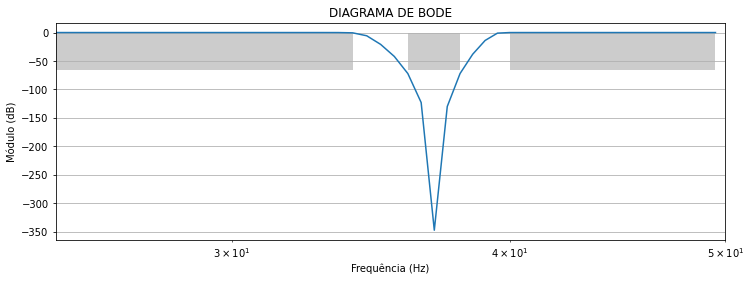

In [9]:
##############################################################################
#3 PROJETO DO FILTRO IIR

z1, p1, k1 = signal.iirdesign(wp=[wp1/(ws/2), wp2/(ws/2)],
                              ws=[wr1/(ws/2), wr2/(ws/2)], gpass=Ap,
                              gstop=Ar, analog=False, ftype='butter',
                              output='zpk')
sys1=signal.dlti(z1, p1, k1, dt=1/ws)

w= np.logspace(2, 3, 1000)
w1, mag1, phase1 = signal.dbode(sys1)

w1= w1/2/np.pi

plt.figure(figsize=(12,4))
plt.semilogx(w1, mag1);

plt.fill([min(w1), wp1, wp1, min(w1)],[Gr, Gr, Gp, Gp], '0.8', lw=0) # Banda de passagem
plt.fill([max(w1), wp2, wp2, max(w1)],[Gr, Gr, Gp, Gp], '0.8', lw=0) # Banda de passagem
plt.fill([wr1, wr2, wr2, wr1], [Gr, Gr, Gp, Gp], '0.8', lw=0) # Banda de rejeição

plt.title("DIAGRAMA DE BODE") 
plt.xlabel("Frequência (Hz)") 
plt.ylabel("Módulo (dB)")
plt.xlim((25,50))
plt.grid(1)
plt.show();